In [ ]:
%pip install -r ../requirements.txt

In [37]:
import geopandas as gpd
import matplotlib.pyplot as plt
import os

In [38]:
# Directory containing precinct-level data
data_dir = '../data/precinct_results/2020'

In [39]:
# Function to read and process precinct data for a specific state
def process_state_data(state_abbr):
    # Construct the file path for the shapefile
    shapefile_path = os.path.join(data_dir, f"{state_abbr}_2020.shp")
    
    # Read the shapefile
    gdf = gpd.read_file(shapefile_path)
    
    # Ensure the necessary columns exist (adjust if your column names are different)
    # Columns: 'dem_votes' and 'rep_votes' should represent Democratic and Republican votes
    if 'G20PREDBID' not in gdf.columns or 'G20PRERTRU' not in gdf.columns:
        raise ValueError(f"Shapefile for {state_abbr} does not have Biden or Trump vote columns.")
    
    # Calculate net voteshare
    gdf['net_voteshare'] = (gdf['G20PREDBID'] - gdf['G20PRERTRU']) / (gdf['G20PREDBID'] + gdf['G20PRERTRU'])
    
    return gdf


# Function to plot the precinct-level results
def plot_precinct_results(gdf, state_abbr):
    # Plot the precincts colored by net voteshare
    fig, ax = plt.subplots(1, 1, figsize=(12, 8))
    gdf.plot(column = 'net_voteshare', cmap = 'RdBu', legend = True, ax = ax,
             legend_kwds = {'label': "Net Voteshare (Democratic - Republican)", 'orientation': 'horizontal'})
    ax.set_title(f"Precinct-Level Net Voteshare - {state_abbr.upper()}, 2020", fontsize=16)
    ax.axis('off')
    plt.show()

# Function to plot high-resolution precinct maps with zoom
def plot_precinct_zoom(gdf, state_abbr, xlim=None, ylim=None, figsize=(16, 12)):
    """
    Plots a high-resolution map of precincts with zoom capabilities.

    Parameters:
        gdf (GeoDataFrame): GeoDataFrame containing precinct data.
        state_abbr (str): State abbreviation for the plot title.
        xlim (tuple): (min, max) x-axis limits for zooming (longitude).
        ylim (tuple): (min, max) y-axis limits for zooming (latitude).
        figsize (tuple): Size of the output figure.
    """
    # Recast CRS
    gdf = gdf.to_crs("EPSG:4326")
    
    # Create the plot
    fig, ax = plt.subplots(1, 1, figsize=figsize)
    gdf.plot(column='net_voteshare', cmap='RdBu', legend=True, ax=ax,
             legend_kwds={'label': "Net Voteshare (Democratic - Republican)", 'orientation': 'horizontal'})
    
    # Set zoom limits if provided
    if xlim:
        ax.set_xlim(xlim)
    if ylim:
        ax.set_ylim(ylim)
    
    ax.set_title(f"High-Resolution Precinct Map - {state_abbr.upper()}, 2020", fontsize=16)
    ax.axis('off')
    plt.show()

In [40]:
state_abbr = 'ca'

In [41]:
state_gdf = process_state_data(state_abbr)
state_gdf.head()


,COUNTY,CNTY_CODE,FIPS_CODE,SRPREC_KEY,SRPREC,ADDIST,CDDIST,SDDIST,BEDIST,G20PREDBID,G20PRERTRU,G20PRELJOR,G20PREGHAW,G20PREAFUE,G20PREPLAR,geometry,net_voteshare
0,Alameda,1,6001,6001481430,481430,20,15,10,2,0,0,0,0,0,0,"POLYGON ((-13591389.953 4534199.875, -13591391...",NaN
1,Alameda,1,6001,6001430420,430420,20,15,10,2,0,0,0,0,0,0,"POLYGON ((-13591791.751 4534039.872, -13591792...",NaN
2,Alameda,1,6001,6001430410,430410,20,15,10,2,3,1,0,0,0,0,"POLYGON ((-13591451.086 4533620.113, -13591468...",0.5
3,Alameda,1,6001,6001430500,430500,20,15,10,2,1,0,0,0,0,0,"POLYGON ((-13591463.435 4534097.046, -13591464...",1.0
4,Alameda,1,6001,6001430130,430130,20,15,10,2,0,0,0,0,0,0,"POLYGON ((-13591792.296 4532623.256, -13591794...",NaN


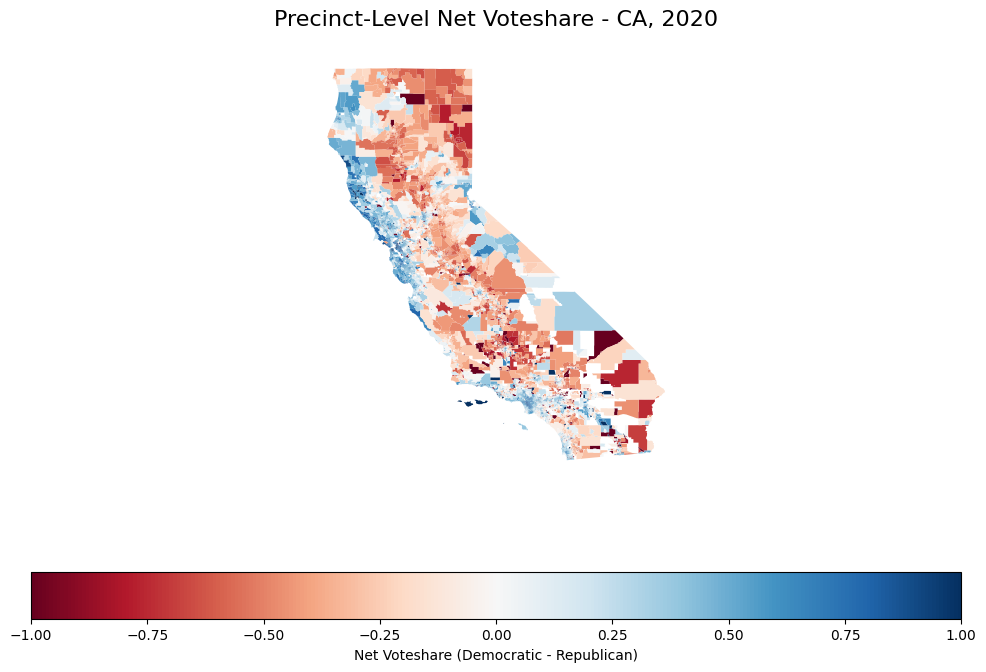

In [42]:
plot_precinct_results(state_gdf, state_abbr)

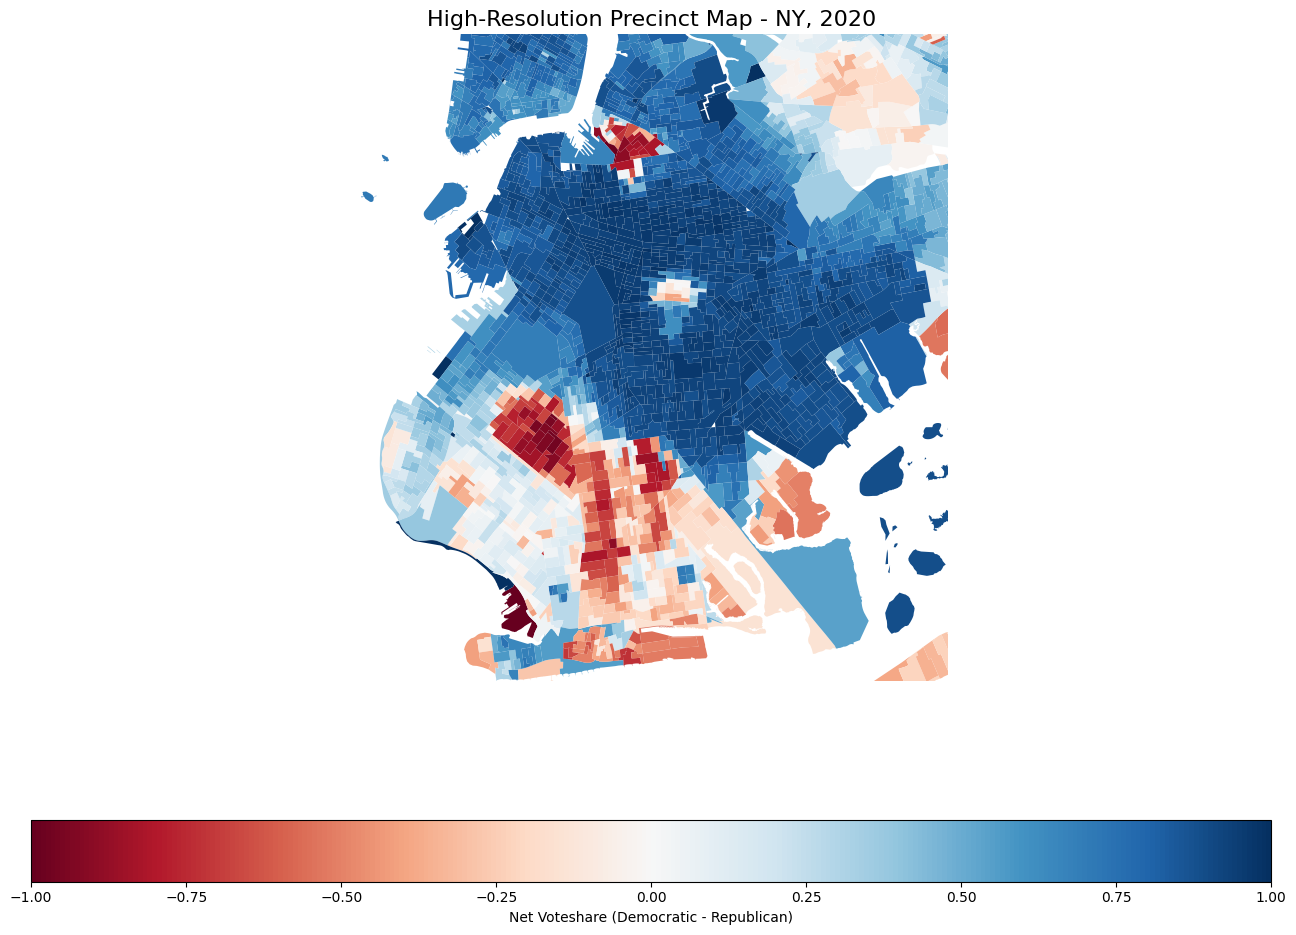

In [32]:
# Zoomed plot (coordinates approximate Manhattan region)
plot_precinct_zoom(
    state_gdf, 
    state_abbr, 
    xlim=(-74.05, -73.85),  # Longitude range for Brooklyn
    ylim=(40.57, 40.73),    # Latitude range for Brooklyn
    figsize=(16, 12)
)

In [25]:
print(state_gdf.crs)


EPSG:3857
